In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
%matplotlib widget

# Plotting format for thesis
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', titlesize=16, labelsize=16)
plt.rc('legend', fontsize=14)
plt.rc('figure', titlesize=18)

Fit parameters: a = 1.0000050040455755, b = 0.42994620933320615


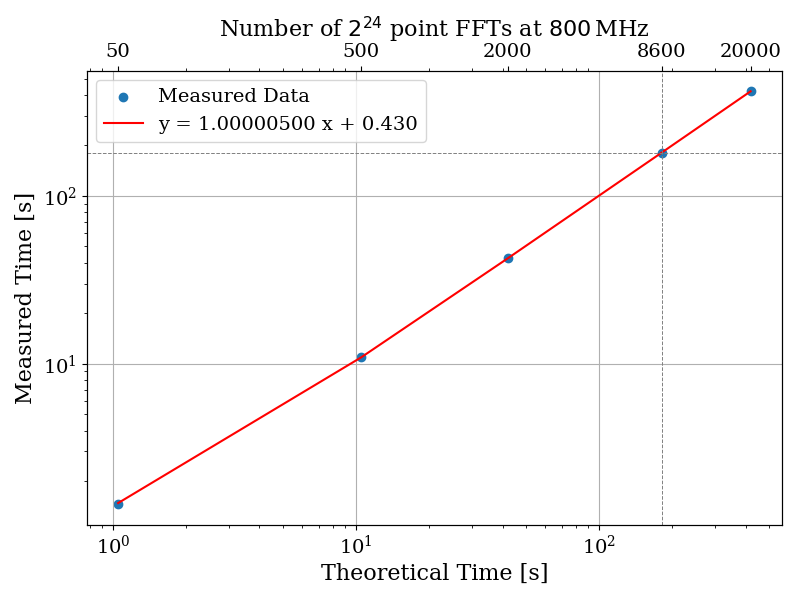

In [45]:
# Data taken randomly on may 16 2024. 800MHz sample rate 2^24pt
theoryTime = [1.0486, 10.485, 41.943, 180.3551, 419.4304]
measuredTime = [1.4616, 10.936, 42.3741,180.7782, 419.8652]


# Define a linear function for fitting
def linear_fit(x, a, b):
    return a * x + b

# Perform the curve fit
params, params_covariance = curve_fit(linear_fit, theoryTime, measuredTime)

# Print fit parameters
print(f"Fit parameters: a = {params[0]}, b = {params[1]}")

# Generate data for the fit line
fit_line = linear_fit(np.array(theoryTime), *params)

# Calculate number of FFTs
sample_rate = 800e6
fft_points = 2**24
fft_time = fft_points / sample_rate
num_ffts = [time / fft_time for time in theoryTime]

# Plot data and fit

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.scatter(theoryTime, measuredTime, label='Measured Data')
ax1.plot(theoryTime, fit_line, label=f'y = {params[0]:.8f} x + {params[1]:.3f}', color='red')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Theoretical Time [s]')
ax1.set_ylabel('Measured Time [s]')
ax1.legend()
ax1.grid()


# Add a second x-axis
ax2 = ax1.twiny()
ax2.set_xscale('log')
ax2.set_xlim(ax1.get_xlim())
ax2.set_xlabel(r'Number of $2^{24}$ point FFTs at $800\,$MHz')
ax2.set_xticks(theoryTime)
ax2.set_xticklabels([f'{n:.0f}' for n in num_ffts])

plt.tight_layout()

# Highlight the 4th data point
index = 3
ax1.axvline(x=theoryTime[index], color='gray', linestyle='--', linewidth=0.7)
ax1.axhline(y=measuredTime[index], color='gray', linestyle='--', linewidth=0.7)


plt.show()

